# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy
import requests
import os
import json
import datetime

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
    - Creating the image predictions folder

In [4]:
images = 'Images folder'
if not os.path.exists(images):
    os.makedirs(images)


   - Creating the request

In [5]:
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL)

- Accessing  and writing the contents

In [6]:
with open(os.path.join(images,URL.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
df_pred = pd.read_csv(r"C:/Users/user/Desktop/Jupyter Notebook/Project Udacity 2/Images folder/image-predictions.tsv", sep = '\t')

In [8]:
df_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import json
from timeit import default_timer as timer
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [9]:
# Converting the json file to a list of dictionnaries
tweets = []
for line in open('tweet_json.json', 'r'):
    tweets.append(json.loads(line))

In [10]:
tweets[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [11]:
tweets[0]['created_at']

'Tue Aug 01 16:23:56 +0000 2017'

In [12]:
# Creating a dataframe to store the extracted features from the created list
df_json = pd.DataFrame(columns = ['tweet_id' ,
                        'retweet_count' ,
                        'favorite_count'])
df_json.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [13]:
# Storing the selected features in df_json dataframe
length = len(tweets)
columns = ['id','retweet_count', 'favorite_count']
for i in range(length):
    ids = tweets[i]['id']
    retweets = tweets[i]['retweet_count']
    count = tweets[i]['favorite_count']
    dicti = {'tweet_id': int(ids),
         'retweet_count': retweets,
         'favorite_count': count}
    dicti = pd.DataFrame(dicti, columns = df_json.columns, index=[i])
    df_json = pd.concat([df_json,dicti], ignore_index = True)

In [14]:
df_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6978,33698
1,892177421306343426,5280,29230
2,891815181378084864,3466,21974
3,891689557279858688,7190,36780
4,891327558926688256,7723,35167
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,245
2324,666033412701032449,36,100
2325,666029285002620928,39,112


## Assessing Data

In [15]:
df.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
495,813172488309972993,NaN,NaN,2016-12-26 00:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eleanor. She winks like she knows many...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813172488...,12,10,Eleanor,None,None,None,None
119,869772420881756160,NaN,NaN,2017-05-31 04:27:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dewey (pronounced ""covfefe""). He's hav...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/869772420...,13,10,Dewey,None,None,None,None
1945,673707060090052608,NaN,NaN,2015-12-07 03:34:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673707060...,10,10,Raymond,None,None,pupper,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
1180,719339463458033665,NaN,NaN,2016-04-11 01:41:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lucy and Sophie. They think they'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719339463...,10,10,Lucy,None,None,None,None
1660,683078886620553216,NaN,NaN,2016-01-02 00:14:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a nifty leaping pupper. Feet look ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683078886...,9,10,None,None,None,pupper,None
833,768554158521745409,NaN,NaN,2016-08-24 21:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Nollie. She's waving at...,7.399792e+17,4.196984e+09,2016-06-07 00:36:02 +0000,https://twitter.com/dog_rates/status/739979191...,12,10,Nollie,None,None,None,None


In [16]:
# Showing null values for each column
df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
df_pred.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
df.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [19]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [20]:
# Showing all records having 0s in the favorite_count column
df_json.query("favorite_count == 0")

,tweet_id,retweet_count,favorite_count
31,886054160059072513,93,0
35,885311592912609280,15379,0
67,879130579576475649,5715,0
72,878404777348136964,1071,0
73,878316110768087041,5503,0
...,...,...,...
995,746521445350707200,898,0
1015,743835915802583040,1862,0
1214,711998809858043904,121,0
2230,667550904950915073,28,0


In [21]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [24]:
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [25]:
# Showing records having more than one dog stage

In [26]:
df[(df.doggo != 'None') & (df.pupper != 'None')][['pupper', 'floofer', 'doggo', 'puppo']]

,pupper,floofer,doggo,puppo
460,pupper,None,doggo,None
531,pupper,None,doggo,None
565,pupper,None,doggo,None
575,pupper,None,doggo,None
705,pupper,None,doggo,None
733,pupper,None,doggo,None
778,pupper,None,doggo,None
822,pupper,None,doggo,None
889,pupper,None,doggo,None
956,pupper,None,doggo,None


In [27]:
df[(df.doggo != 'None') & (df.puppo != 'None')][['pupper', 'floofer', 'doggo', 'puppo']]

,pupper,floofer,doggo,puppo
191,None,None,doggo,puppo


In [28]:
df[(df.doggo != 'None') & (df.floofer != 'None')][['pupper', 'floofer', 'doggo', 'puppo']]

,pupper,floofer,doggo,puppo
200,None,floofer,doggo,None


In [29]:
df[(df.pupper != 'None') & (df.puppo != 'None')][['pupper', 'floofer', 'doggo', 'puppo']]

,pupper,floofer,doggo,puppo


### Quality issues

    1. Missing values in multiple columns

    2. Html tags in the source columns must be cleaned
    
    3. rating_denominator contains values other than 10

    4. Existence of retweets therefore there is duplicates

    5. Erraneous datatype in (favorite_count, retweet_count, p_dog and timestamp) columns

    6. Nulls represented as None in name column

    7. Name column contains multiple invalid dog names ('a', 'an', 'the')

    8. Dog stage columns contain multiple dog stage at once 

### Tidiness issues

1. The language used to describe dogs (Doggo, Pupper...) must be in one column (stage)


2. Existence of three datasets related to tweets having `tweet_id` column in common.

## Cleaning Data

### Existence of three datasets related to tweets having `tweet_id` column in common.

#### Define :
Merging all three dataset into one single dataframe on `tweet_id` with pandas's `merge()` method

#### Code

In [31]:
df = pd.merge(df, df_json, how='outer', on='tweet_id', sort=True)

In [32]:
df = pd.merge(df, df_pred, how = 'outer', on ='tweet_id', sort = True)

#### Test

In [107]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

##### **Making a copy of original piece of data**

In [33]:
df_cleaned = df.copy()

### `df_cleaned` **Missing values in multiple columns**

#### Define
Droping rows that contains NaN values in all predictions rows and imputing the retweet count and favorite count with the mean

#### Code

In [34]:
df_cleaned.dropna(subset = ['p1', 'p1_conf', 'p1_dog'], how = 'all', inplace=True)

In [35]:
df_cleaned.favorite_count.replace(0, np.nan, inplace=True)

In [36]:
df_cleaned.favorite_count.isna().sum()

89

In [37]:
mode_ret = df_cleaned.retweet_count.mode()[0]
mode_fav = df_cleaned.favorite_count.mode()[0]
df_cleaned.retweet_count.fillna(mode_ret, inplace=True)
df_cleaned.favorite_count.fillna(mode_fav, inplace=True)

In [38]:
df_cleaned.favorite_count

0        2283.0
1         112.0
2         100.0
3         245.0
4          88.0
         ...   
2351    35167.0
2352    36780.0
2353    21974.0
2354    29230.0
2355    33698.0
Name: favorite_count, Length: 2075, dtype: float64

In [39]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

### `source` column : html tags must be cleaned

#### Define :
Extracting the html tags keeping only the url txt

#### Code

In [40]:
df_cleaned.source = df_cleaned.source.str.extract('"([^"]*)" ')

#### Test

In [41]:
df_cleaned.source.head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

### `rating_denominator` column contains values less and larger than 10

#### Define :
Fixing denominator values other than 10

#### Code

In [42]:
df_cleaned.rating_denominator = 10

In [43]:
df_cleaned.rating_denominator.value_counts()

10    2075
Name: rating_denominator, dtype: int64

### Existence of `retweets` therefore there is duplicates

#### Define 
Dropping the retweets rows as we need only the original tweets and dropping empty columns

#### Code

In [44]:
retweet_ind = df_cleaned[~df_cleaned['retweeted_status_id'].isna()].index

In [45]:
df_cleaned.drop(index=retweet_ind, inplace = True)

In [46]:
df_cleaned.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace =True)

In [47]:
df_cleaned.reset_index(inplace = True)

#### Test

In [48]:
df_cleaned.columns

Index(['index', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### `Erraneous` datatypes in (favorite_count, retweet_count, p_dog, img_num and timestamp) columns

Converting `favorite_count`, `img_num` and `retweet count` to int, Converting `p_dog` to boolean and `timestamp` to datetime

#### Code

In [49]:
df_cleaned.dtypes

index                      int64
tweet_id                  object
in_reply_to_status_id    float64
in_reply_to_user_id      float64
timestamp                 object
source                    object
text                      object
expanded_urls             object
rating_numerator           int64
rating_denominator         int64
name                      object
doggo                     object
floofer                   object
pupper                    object
puppo                     object
retweet_count              int64
favorite_count           float64
jpg_url                   object
img_num                  float64
p1                        object
p1_conf                  float64
p1_dog                    object
p2                        object
p2_conf                  float64
p2_dog                    object
p3                        object
p3_conf                  float64
p3_dog                    object
dtype: object

In [50]:
df_cleaned.favorite_count = df_cleaned.favorite_count.astype(int)
df_cleaned.retweet_count = df_cleaned.retweet_count.astype(int)

In [51]:
df_cleaned.p1_dog = df_cleaned['p1_dog'].replace({'True': True, 'False': False})
df_cleaned['p2_dog'] =  df_cleaned['p2_dog'].replace({'True': True, 'False': False})
df_cleaned.p3_dog = df_cleaned['p3_dog'].replace({'True': True, 'False': False})

In [52]:
df_cleaned.timestamp = pd.to_datetime(df_cleaned.timestamp)

In [53]:
df_cleaned.img_num = df_cleaned.img_num.astype(int)

#### Test

In [54]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   index                  1994 non-null   int64              
 1   tweet_id               1994 non-null   object             
 2   in_reply_to_status_id  23 non-null     float64            
 3   in_reply_to_user_id    23 non-null     float64            
 4   timestamp              1994 non-null   datetime64[ns, UTC]
 5   source                 1994 non-null   object             
 6   text                   1994 non-null   object             
 7   expanded_urls          1994 non-null   object             
 8   rating_numerator       1994 non-null   int64              
 9   rating_denominator     1994 non-null   int64              
 10  name                   1994 non-null   object             
 11  doggo                  1994 non-null   object           

In [55]:
df_cleaned.timestamp.dt.year

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
1989    2017
1990    2017
1991    2017
1992    2017
1993    2017
Name: timestamp, Length: 1994, dtype: int64

In [56]:
df_cleaned.img_num.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1994 entries, 0 to 1993
Series name: img_num
Non-Null Count  Dtype
--------------  -----
1994 non-null   int32
dtypes: int32(1)
memory usage: 7.9 KB


### `name` column : Nulls represented as None

#### Define :
Replacing None values in the name column with NaN 

#### Code

In [57]:
df_cleaned.name = df_cleaned.name.replace('None', np.nan)

#### Test

In [58]:
df_cleaned.name.unique()[0:4]

array([nan, 'a', 'an', 'the'], dtype=object)

### `name` column have multiple invalid values ('a', 'an', 'the')

#### Define :
Replacing the invalid names with NaN

#### Code

In [59]:
rep_dict = {'a' : np.nan, 'an' : np.nan, 'the' : np.nan}

In [60]:
def replace_invalid(df):
    if df['name'] in rep_dict.keys():
        valid = rep_dict[df['name']]
        return valid
    else:
        return df['name']
    
df_cleaned['name'] = df_cleaned.apply(replace_invalid, axis=1)

#### Test

In [61]:
df_cleaned.name.unique()[0:3]

array([nan, 'quite', 'Walter'], dtype=object)

### dog stage columns contain multiple dog stage at once 

#### Define :
Cleaning the records that contain more than one stage value referring to their text and by iterating through each record

#### Code

In [62]:
df_cleaned[(df_cleaned.doggo != 'None') & (df_cleaned.pupper != 'None')]['text']

1152    Like father (doggo), like son (pupper). Both 1...
1198    This is just downright precious af. 12/10 for ...
1289    Please stop sending it pictures that don't eve...
1341    Meet Maggie &amp; Lila. Maggie is the doggo, L...
1483    This is Pinot. He's a sophisticated doggo. You...
1568    This is Bones. He's being haunted by another d...
1574    Like doggo, like pupper version 2. Both 11/10 ...
1596    Here we have Burke (pupper) and Dexter (doggo)...
1653    This is Dido. She's playing the lead role in "...
Name: text, dtype: object

##### Looks like we have two dogs in each image of the above records so i am going to keep them

In [63]:
df_cleaned[(df_cleaned.doggo != 'None') & (df_cleaned.floofer != 'None')
                   | ((df_cleaned.doggo != 'None') & (df_cleaned.puppo != 'None'))]['text']

1839    At first I thought this was a shy doggo, but i...
1845    Here's a puppo participating in the #ScienceMa...
Name: text, dtype: object

In [64]:
df_cleaned[(df_cleaned.doggo != 'None') & (df_cleaned.floofer != 'None')
                   | ((df_cleaned.doggo != 'None') & (df_cleaned.puppo != 'None'))]['text'][1839]
    

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [65]:
df_cleaned[(df_cleaned.doggo != 'None') & (df_cleaned.floofer != 'None')
                   | ((df_cleaned.doggo != 'None') & (df_cleaned.puppo != 'None'))]['text'][1845]
    

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [66]:
for i, row in df_cleaned[(df_cleaned.doggo != 'None') & (df_cleaned.floofer != 'None')
                   | ((df_cleaned.doggo != 'None') & (df_cleaned.puppo != 'None'))].iterrows():
    df_cleaned.at[i,'doggo'] = 'None'

In [67]:
for i, row in df_cleaned[(df_cleaned.doggo != 'None') & (df_cleaned.pupper != 'None')].iterrows():
    df_cleaned.at[i,'pupper'] = 'None'

#### Test

In [68]:
df_cleaned[(df_cleaned.doggo != 'None') & (df_cleaned.floofer != 'None')
                   | ((df_cleaned.doggo != 'None') & (df_cleaned.puppo != 'None'))]

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [69]:
df_cleaned.doggo.value_counts()

None     1922
doggo      72
Name: doggo, dtype: int64

In [70]:
df_cleaned.pupper.value_counts()

None      1791
pupper     203
Name: pupper, dtype: int64

In [71]:
df_cleaned.puppo.value_counts()

None     1971
puppo      23
Name: puppo, dtype: int64

In [72]:
df_cleaned.floofer.value_counts()

None       1986
floofer       8
Name: floofer, dtype: int64

## **Tidiness issues**

### The language used to describe dogs (Doggo, Pupper...) must be in one column `stage`

### Define :
Merging all (pupper, floofer, doggo, puppo) column into one single column stage, Converting the stage column to categorical type

#### Code

In [73]:
df_stage = df_cleaned[['tweet_id', 'pupper' ,'floofer', 'doggo', 'puppo']].copy()

In [74]:
df_stage['stage'] = df_stage[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [75]:
df_stage.drop(['pupper' ,'floofer', 'doggo', 'puppo'], axis= 1 , inplace =True)

In [76]:
df_cleaned = pd.merge(df_cleaned, df_stage, on = 'tweet_id', sort = True)

In [77]:
df_cleaned.columns

Index(['index', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'stage'],
      dtype='object')

In [78]:
df_cleaned.drop(['pupper' ,'floofer', 'doggo', 'puppo'], axis = 1, inplace = True)

In [79]:
df_cleaned['stage'] = df_cleaned['stage'].astype('category')

In [80]:
df_cleaned.reset_index(inplace= True)

#### Test

In [81]:
df_cleaned.stage.value_counts()

None       1688
pupper      203
doggo        72
puppo        23
floofer       8
Name: stage, dtype: int64

###  A new column `dog_breed` must be added based on the img_num and p1_dog

#### Define :
Creating new `dog_breed` column based on the img_num prediction then dropping all prediction column, Knowing that `img_num` is the image number that corresponded to the most confident prediction

#### Code

In [82]:
df_cleaned.img_num.value_counts()

1    1711
2     191
3      62
4      30
Name: img_num, dtype: int64

In [83]:
for i, row in df_cleaned.iterrows():
    if (row['img_num'] == 1 | row['img_num'] == 4) & row['p1_dog']:
        p = row['p1']
    elif row['img_num'] == 2 & row['p2_dog'] :
        p = row['p2']
    elif row['img_num'] == 3 & row['p3_dog'] :
        p = row['p3']
        
    df_cleaned.at[i,'dog_breed'] = p

In [84]:
df_cleaned.loc[:, 'img_num':]

,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,dog_breed
0,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,None,Shetland_sheepdog
1,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,None,Rhodesian_ridgeback
2,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,None,bloodhound
3,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,None,miniature_pinscher
4,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,None,Doberman
...,...,...,...,...,...,...,...,...,...,...,...,...
1989,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None,Chesapeake_Bay_retriever
1990,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None,Chesapeake_Bay_retriever
1991,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None,kelpie
1992,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None,papillon


In [85]:
drop_col = ['index','img_num', 'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']

In [86]:
df_cleaned.drop(drop_col, axis = 1, inplace = True)

#### Test

In [87]:
df_cleaned['dog_breed'].value_counts()

Labrador_retriever      112
Chihuahua                79
golden_retriever         70
kuvasz                   51
Eskimo_dog               49
                       ... 
komondor                  1
Irish_wolfhound           1
Kerry_blue_terrier        1
Sussex_spaniel            1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 116, dtype: int64

In [88]:
df_cleaned.head()

,level_0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,stage,dog_breed
0,0,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,http://twitter.com/download/iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,420,2283,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,None,Shetland_sheepdog
1,1,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,39,112,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,None,Rhodesian_ridgeback
2,2,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,36,100,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,None,bloodhound
3,3,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,115,245,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,None,miniature_pinscher
4,4,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,36,88,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,None,Doberman


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [89]:
df_cleaned.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [90]:
df_cleaned.describe()

,level_0,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1994.000000,2.300000e+01,2.300000e+01,1994.000000,1994.0,1994.000000,1994.000000
mean,996.500000,6.978112e+17,4.196984e+09,12.280843,10.0,2225.376128,7659.397693
std,575.762538,4.359384e+16,0.000000e+00,41.497718,0.0,3996.479618,11312.664057
min,0.000000,6.671522e+17,4.196984e+09,0.000000,10.0,11.000000,66.000000
25%,498.250000,6.732411e+17,4.196984e+09,10.000000,10.0,489.250000,1655.750000
50%,996.500000,6.757073e+17,4.196984e+09,11.000000,10.0,1070.000000,3423.000000
75%,1494.750000,7.031489e+17,4.196984e+09,12.000000,10.0,2535.500000,9502.000000
max,1993.000000,8.558181e+17,4.196984e+09,1776.000000,10.0,70408.000000,144277.000000


In [91]:
years = df_cleaned.groupby(df_cleaned['timestamp'].dt.year)['retweet_count'].sum()

In [92]:
years

timestamp
2015     569967
2016    2156637
2017    1710796
Name: retweet_count, dtype: int32

In [93]:
df_viz = df_cleaned[df_cleaned['stage'] != 'None'].copy()
df_viz =  df_viz[df_viz['rating_numerator'] >= 10]

In [94]:
df_viz.stage.replace('None', np.nan, inplace =True)

In [95]:
df_viz.groupby('stage')['rating_numerator'].mean()

stage
doggo      12.044118
floofer    11.875000
pupper     11.371951
puppo      12.181818
Name: rating_numerator, dtype: float64

In [96]:
df_viz['year'] = df_viz['timestamp'].dt.year

In [97]:
df_viz.groupby('year')['retweet_count'].sum()

year
2015     51560
2016    470345
2017    380624
Name: retweet_count, dtype: int32

In [98]:
df_breed = pd.DataFrame()

In [99]:
def func(group):
    return group.loc[group['retweet_count'] == group['retweet_count'].max()]

#Calculating the most retweeted posts for each dog breed in each year
df_breed = df_viz.groupby(['year', 'dog_breed'], as_index=False).sum()

# Selecting the most retweeted breed for each year
df_breed = df_breed.groupby('year', as_index=False).apply(func).reset_index(drop=True)
df_breed.drop(['level_0','in_reply_to_status_id','in_reply_to_user_id','rating_numerator','rating_denominator'], axis = 1 , inplace = True)
df_breed.head()

,year,dog_breed,retweet_count,favorite_count
0,2015,French_bulldog,15094,39433
1,2016,whippet,70408,144277
2,2017,Tibetan_terrier,52182,125239


In [100]:
df_cleaned['name'].value_counts().head()

Charlie    11
Cooper     10
Lucy       10
Oliver     10
Tucker      9
Name: name, dtype: int64

### Insights:
1. `Puppo` is the most rated stage by `12.52`


2. In 2015 `French_bulldog` is the most retweeted breed (12547 retweet), In 2016 we found `whippet` (70408 retweet)

    and finally in 2017 `Tibetan_terrier` is the most retweeted breed (52182 retweet)


3. We notice an increase in retweets from `2015` to `2016` then a slight decrease in `2017`


4. `12` and `13` are the most used values to rate dogs


5. `Charlie`, `Cooper`, `Lucy` and `Oliver` are the most commonly traded names

### Visualization

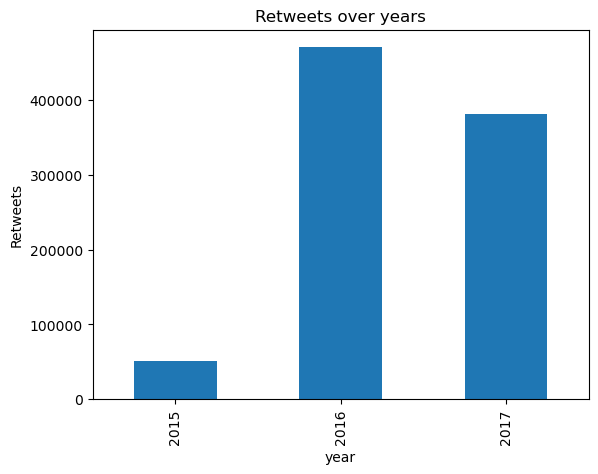

In [101]:
df_viz.groupby('year')['retweet_count'].sum().plot(kind='bar')
plt.title('Retweets over years')
plt.ylabel('Retweets')
plt.show()

**We notice from the above plot that the @dog_rates retweets had drastically increased in 2016 followed by a decrease in 2017**

****

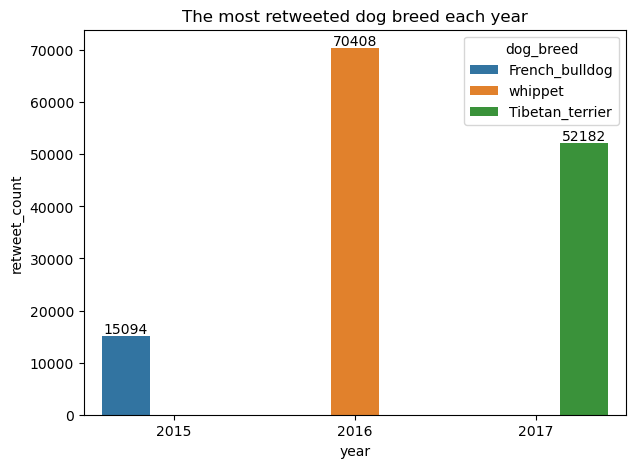

In [102]:
ax = sns.barplot(x = 'year', y = 'retweet_count', data = df_breed, hue='dog_breed')
ax.set(title='The most retweeted dog breed each year')
ax.figure.set_size_inches(7,5)
for i in ax.containers:
    ax.bar_label(i,)

**The above plot represents the most retweeted dog breed for each year, In 2015 we have French bulldog with 15094 retweet, Moving to 2016 we find in the top of the list Whippet breed, And finally we have Tibetan terrier in 2017**

****

Text(0.5, 1.0, 'Retweets distribution')

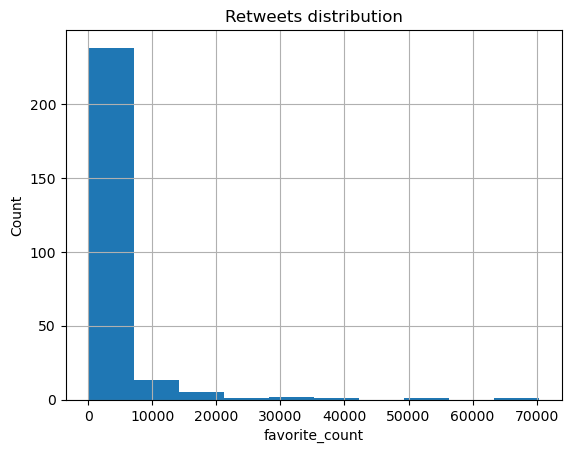

In [103]:
df_viz.retweet_count.hist()
plt.xlabel('favorite_count')
plt.ylabel('Count')
plt.title('Retweets distribution')

**The above histogram shows a right skewed distribution for retweets**

****

Text(0.5, 1.0, 'Rating Distribution')

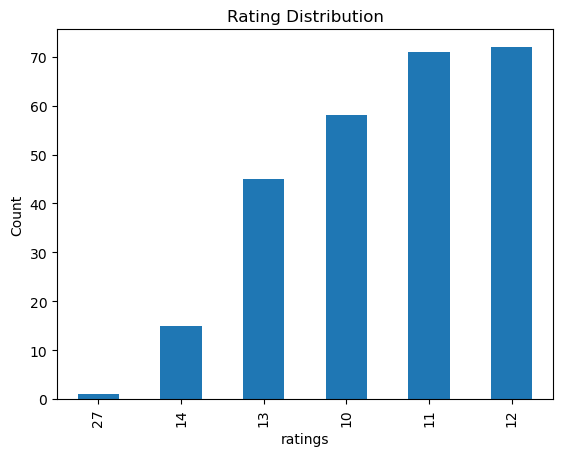

In [104]:
df_viz.rating_numerator.value_counts().sort_values().plot(kind='bar')
plt.xlabel('ratings')
plt.ylabel('Count')
plt.title('Rating Distribution')

**We notice from this left skewed distribution that most dogs are rated from 11 to 12 ignoring 27 which considered as an outlier**

****

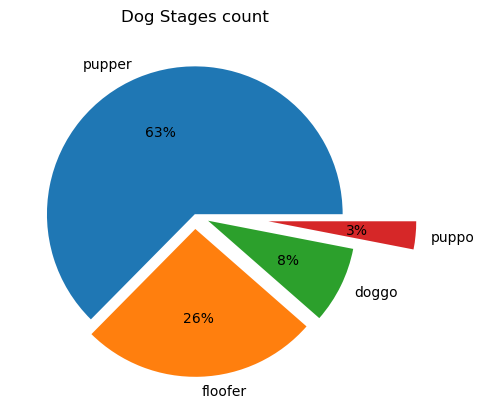

In [105]:
labels = df_viz['stage'].unique()
plt.pie(df_viz['stage'].value_counts(), labels = labels, autopct='%.0f%%', explode = (0, 0.1, 0.1, 0.5))
plt.title('Dog Stages count')
plt.show()

**As we can see in this pie chart most posted dogs are in the pupper stage with 63%, then comes the floofer stage with 26%.
People tend to own dogs in pupper and floofer stages more than doggo and puppo**